# Interpolation with algebraic polynoms

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f1(x):
    return x ** 2 * np.sin(2 * x)

def f2(x):
    return abs(x) - 1

In [3]:
def lagrange_polynom(x_vec, x_global, f_vec, n):
    return [np.array([f_vec[i] * np.prod(np.array([x - x_vec[j] for j in range(n + 1) if i != j])) /
             np.prod(np.array([x_vec[i] - x_vec[j] for j in range(n + 1) if i != j])) for i in range(n + 1)]).sum()
             for x in x_global]

In [4]:
def print_plots(x, f, p, n):
    plt.figure(figsize=(10, 6))
    #plt.xlim(-2.5, 2.5)
    #plt.ylim(-3.5, 3.5)
    plt.plot(x, f, color='green', label='f(x)')
    plt.scatter(x, p, color='red', label='$P_n(x)$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best', prop={'size': 12})
    plt.title('Interpolation (n = {0})'.format(n))
    plt.show()

### Equidistance Nodes

In [17]:
x_values = [-2 + i * 0.04 for i in range(101)]
f1_values = [f1(i) for i in x_values]
f2_values = [f2(i) for i in x_values]

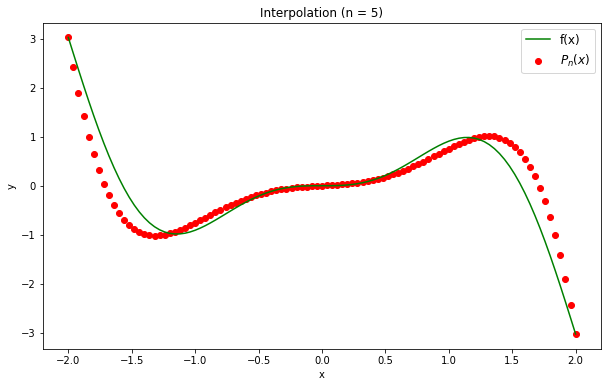

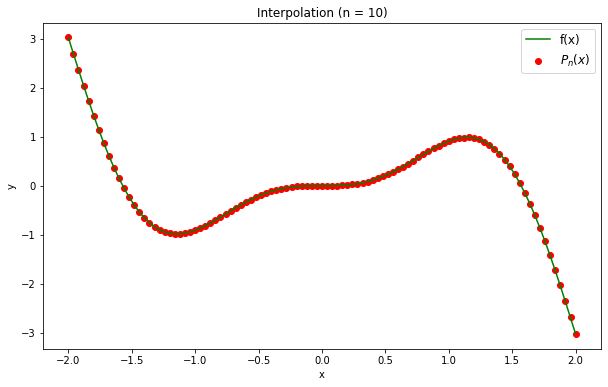

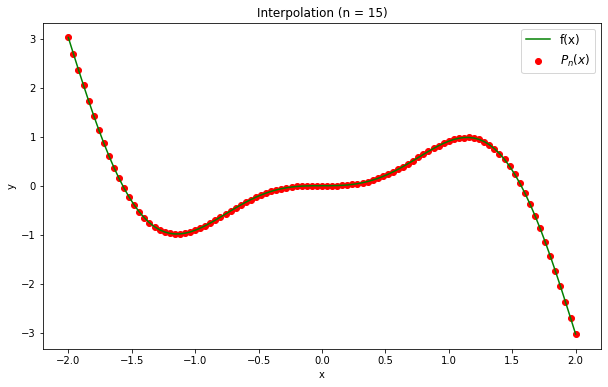

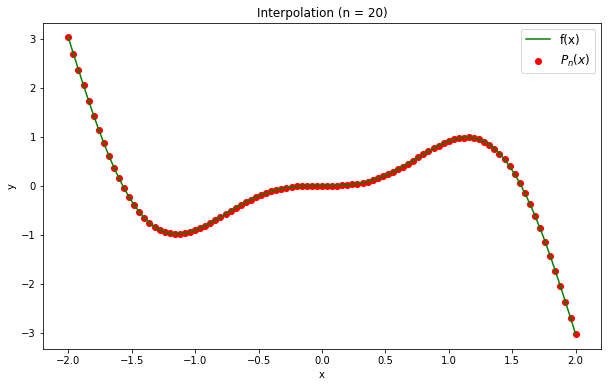

In [18]:
degrees = [5, 10, 15, 20]
delta1 = []
for n in degrees:
    x_build = [-2 + j * 4 / n for j in range(n + 1)]
    f1_build = [f1(i) for i in x_build]
    p_values = lagrange_polynom(x_build, x_values, f1_build, n)
    delta1.append(('delta (n = {0})'.format(n), np.linalg.norm(np.array(f1_values) - np.array(p_values), ord=np.inf)))
    print_plots(x_values, f1_values, p_values, n)

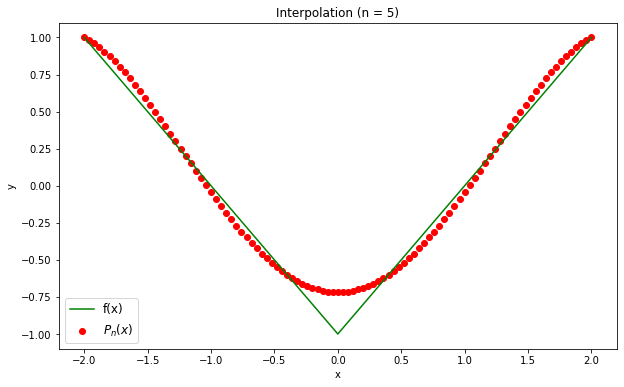

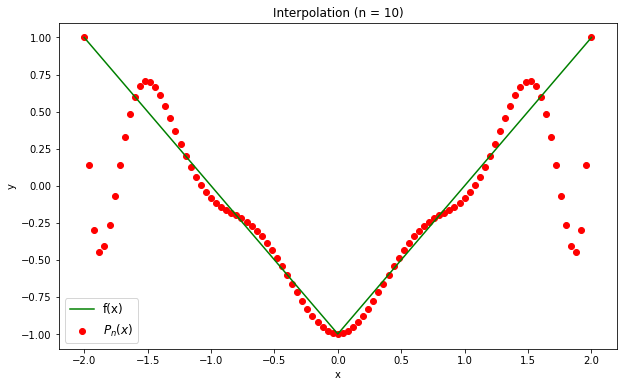

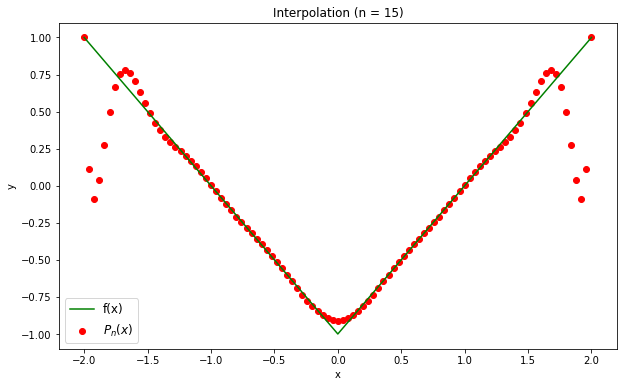

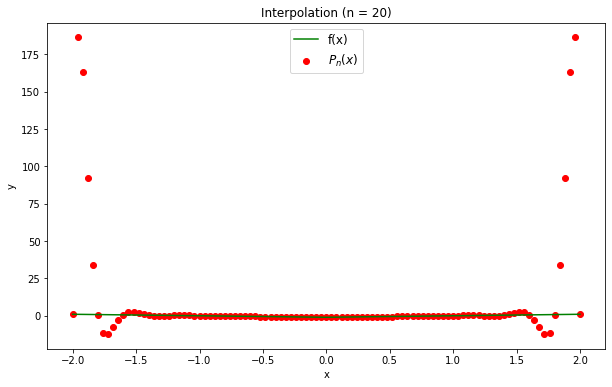

In [19]:
delta2 = []
for n in degrees:
    x_build = [-2 + j * 4 / n for j in range(n + 1)]
    f2_build = [f2(i) for i in x_build]
    p_values = lagrange_polynom(x_build, x_values, f2_build, n)
    delta2.append(('delta (n = {0})'.format(n), np.linalg.norm(np.array(f2_values) - np.array(p_values), ord=np.inf)))
    print_plots(x_values, f2_values, p_values, n)

In [20]:
print('Deltas for f1(x):')
display(delta1)

Deltas for f1(x):


[('delta (n = 5)', 0.8258085514406528),
 ('delta (n = 10)', 0.015515296133076006),
 ('delta (n = 15)', 3.3174054356877036e-06),
 ('delta (n = 20)', 1.7194925483465795e-09)]

In [21]:
print('Deltas for f2(x):')
display(delta2)

Deltas for f2(x):


[('delta (n = 5)', 0.28125),
 ('delta (n = 10)', 1.327093849408877),
 ('delta (n = 15)', 1.0067981153218337),
 ('delta (n = 20)', 185.39834879784388)]

### Chebyshev nodes

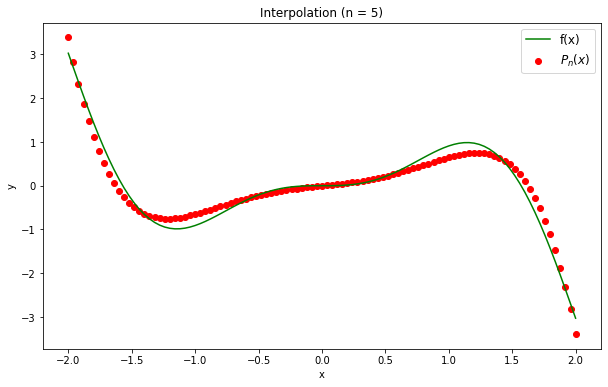

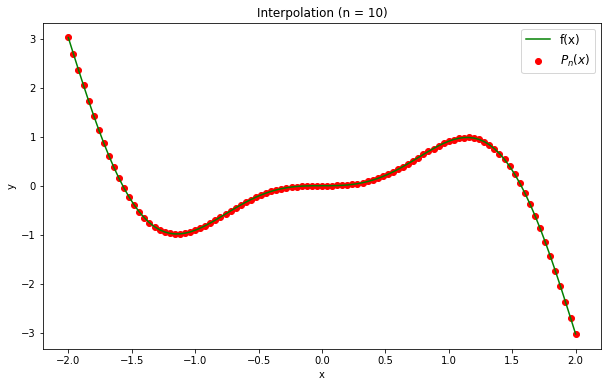

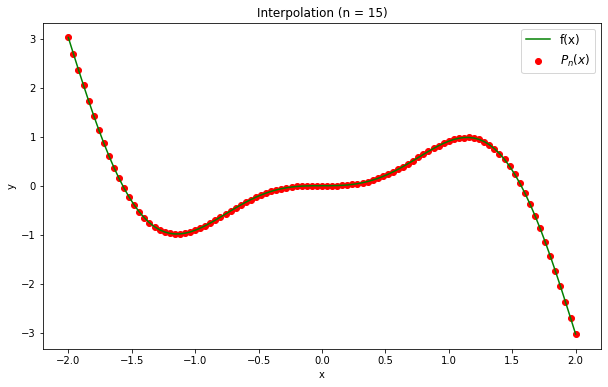

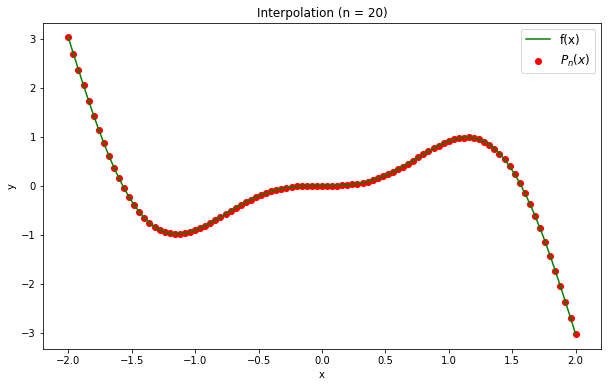

In [22]:
delta1 = []
for n in degrees:
    x_build = [2 * np.cos((2 * i + 1) * np.pi / (2 * (n + 1))) for i in range(n + 1)]
    f1_build = [f1(i) for i in x_build]
    p_values = lagrange_polynom(x_build, x_values, f1_build, n)
    delta1.append(('delta (n = {0})'.format(n), np.linalg.norm(np.array(f1_values) - np.array(p_values), ord=np.inf)))
    print_plots(x_values, f1_values, p_values, n)

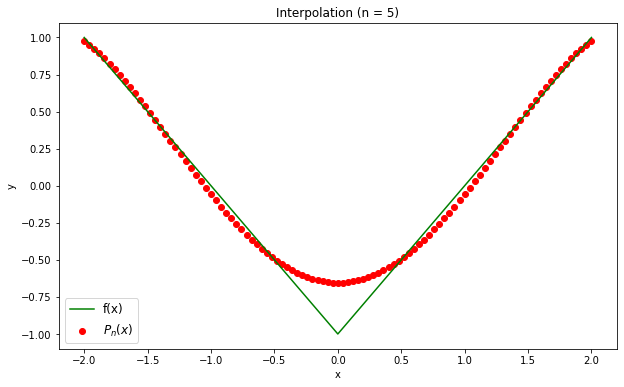

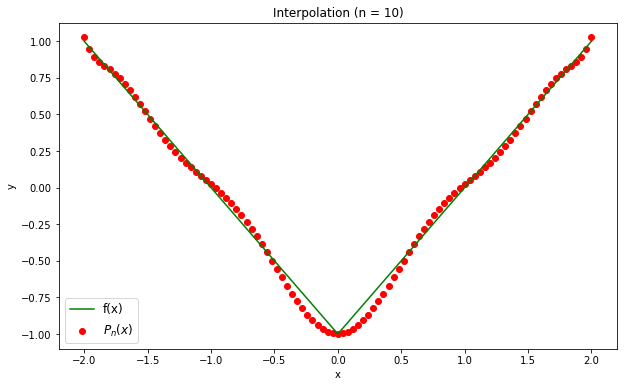

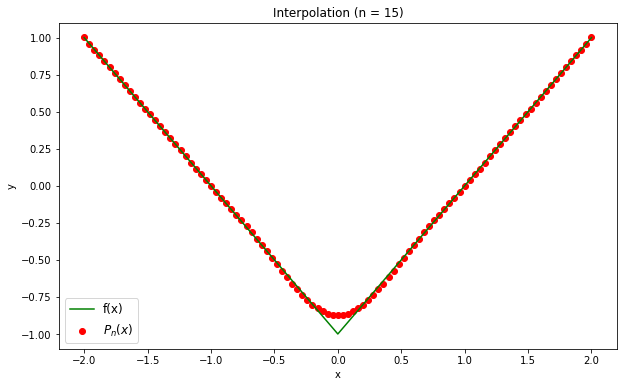

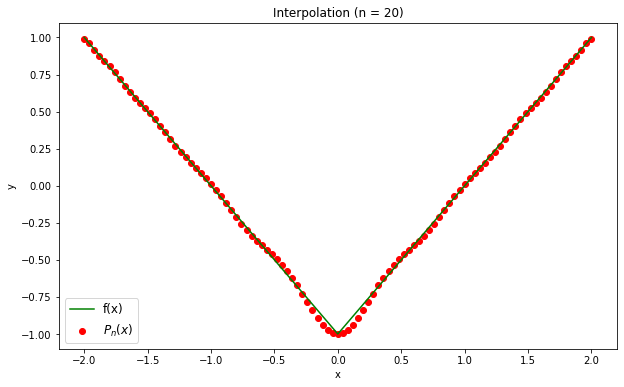

In [23]:
delta2 = []
for n in degrees:
    x_build = [2 * np.cos((2 * i + 1) * np.pi / (2 * (n + 1))) for i in range(n + 1)]
    f2_build = [f2(i) for i in x_build]
    p_values = lagrange_polynom(x_build, x_values, f2_build, n)
    delta2.append(('delta (n = {0})'.format(n), np.linalg.norm(np.array(f2_values) - np.array(p_values), ord=np.inf)))
    print_plots(x_values, f2_values, p_values, n)

In [24]:
print('Deltas for f1(x):')
display(delta1)

Deltas for f1(x):


[('delta (n = 5)', 0.36068127190938526),
 ('delta (n = 10)', 0.001868572449848234),
 ('delta (n = 15)', 7.443502036963423e-08),
 ('delta (n = 20)', 7.026296211520844e-12)]

In [25]:
print('Deltas for f2(x):')
display(delta2)

Deltas for f2(x):


[('delta (n = 5)', 0.34509206013669425),
 ('delta (n = 10)', 0.10911123975057857),
 ('delta (n = 15)', 0.1256048215470389),
 ('delta (n = 20)', 0.05695036824874389)]